In [12]:
import pandas as pd
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

## Importing and Checking Loan Data

In [3]:
zip_df = pd.read_csv("zip_only_data.csv")

In [4]:
zip_df.head()

,Unnamed: 0,zip_code,applicant_result
0,0,481xx,0
1,1,010xx,0
2,2,212xx,0
3,3,017xx,0
4,4,209xx,0


In [5]:
zip_df = zip_df.drop(['Unnamed: 0'], axis = 1)

In [6]:
zip_df.head()

,zip_code,applicant_result
0,481xx,0
1,010xx,0
2,212xx,0
3,017xx,0
4,209xx,0


In [7]:
zip_df['zip_code'].value_counts()

112xx    291010
770xx    281401
300xx    280926
331xx    264547
606xx    256209
          ...  
004xx        11
869xx        10
699xx         9
579xx         3
09Oxx         1
Name: zip_code, Length: 1001, dtype: int64

In [8]:
zip_df.isnull().sum()

zip_code            0
applicant_result    0
dtype: int64

## Importing and Checking Map Data

In [9]:
df = gpd.read_file('tl_rd22_us_zcta520.shp')

In [10]:
# Print out the columns
print('===== Columns ======')
print(df.columns)
print()

# Print out one row of data
print('===== First row =====')
print(df.loc[0])

===== Columns ======
Index(['ZCTA5CE20', 'GEOID20', 'CLASSFP20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20',
       'AWATER20', 'INTPTLAT20', 'INTPTLON20', 'geometry'],
      dtype='object')

===== First row =====
ZCTA5CE20                                                 35592
GEOID20                                                   35592
CLASSFP20                                                    B5
MTFCC20                                                   G6350
FUNCSTAT20                                                    S
ALAND20                                               298552385
AWATER20                                                 235989
INTPTLAT20                                          +33.7427261
INTPTLON20                                         -088.0973903
geometry      POLYGON ((-88.247351 33.653896, -88.247132 33....
Name: 0, dtype: object


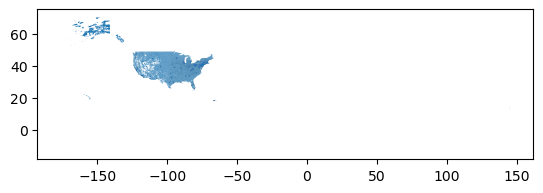

In [13]:
df.plot()
plt.savefig('world.png')

## Setting the Zip Code Data

#### Ratio of accepted applicants to total

In [48]:
zip_ratio = pd.DataFrame(columns=['accepted_to_total_ratio', 'zip_code'])

In [77]:
zip_df['zip_code'][zip_df['zip_code']=="09Oxx"] = "090xx"

C:\Users\orteg\AppData\Local\Temp\ipykernel_13644\660033160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['zip_code'][zip_df['zip_code']=="09Oxx"] = "090xx"


In [78]:
zip_df.reset_index(drop=True, inplace=True)

In [49]:
zip_accepted = zip_df[zip_df['applicant_result']==1]

In [50]:
zip_accepted.head()

,zip_code,applicant_result
27648448,190xx,1
27648449,577xx,1
27648450,605xx,1
27648451,076xx,1
27648452,174xx,1


In [51]:
len(zip_df[(zip_df['zip_code']=='112xx') & (zip_df['applicant_result']==1)])

23908

In [52]:
len(zip_df[(zip_df['zip_code']=='112xx') & (zip_df['applicant_result']==0)])

267102

In [53]:
lengths = zip_df['zip_code'].value_counts().values

In [54]:
for index, zip_code in enumerate(zip_df['zip_code'].value_counts().index):
    zip_ratio.loc[len(zip_ratio)] = [(len(zip_accepted[zip_accepted['zip_code']==zip_code])/lengths[index]), zip_code]

In [55]:
zip_ratio.head()

,accepted_to_total_ratio,zip_code
0,0.082155,112xx
1,0.062967,770xx
2,0.072962,300xx
3,0.072014,331xx
4,0.082714,606xx


In [56]:
zip_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accepted_to_total_ratio  1001 non-null   float64
 1   zip_code                 1001 non-null   object 
dtypes: float64(1), object(1)
memory usage: 23.5+ KB


accepted = zip_df['zip_code'][zip_df['applicant_result']==1].value_counts().sort_index()

total = zip_df['zip_code'].value_counts().sort_index

## Merging the Data

In [57]:
df.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [58]:
df['zip_code'] = df['ZCTA5CE20'].astype('str')
df['zip_code'] = df['zip_code'].str.pad(5, 'left', '0')
df['zip_code'] = df['zip_code'].str.slice(0,3)
df['zip_code'] = df['zip_code'].str.pad(5, 'right', 'x')

In [59]:
df.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,zip_code
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654...",355xx
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582...",356xx
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349...",356xx
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429...",356xx
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677...",360xx


In [93]:
zip_ratio.zip_code = zip_ratio.zip_code.astype('str')
zip_ratio.zip_code = zip_ratio.zip_code.str.pad(5, 'left', '0')

In [94]:
zip_ratio.sort_values(by='accepted_to_total_ratio')

,accepted_to_total_ratio,zip_code
999,0.000000,579xx
903,0.000000,526xx
968,0.000000,842xx
965,0.000000,536xx
964,0.000000,715xx
...,...,...
512,0.138731,222xx
882,0.139241,094xx
988,0.142857,698xx
975,0.142857,569xx


In [95]:
df_map = df.merge(zip_ratio, on='zip_code', how='inner')

In [96]:
df_map.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,zip_code,accepted_to_total_ratio
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654...",355xx,0.042648
1,35585,35585,B5,G6350,S,120428134,1251701,+34.4193533,-087.8289381,"POLYGON ((-87.95383 34.45180, -87.95364 34.451...",355xx,0.042648
2,35543,35543,B5,G6350,S,95804616,272895,+34.2111552,-087.7584351,"POLYGON ((-87.80682 34.19709, -87.80667 34.197...",355xx,0.042648
3,35581,35581,B5,G6350,S,312159231,3422062,+34.3599117,-087.7130966,"POLYGON ((-87.90219 34.34844, -87.90207 34.348...",355xx,0.042648
4,35570,35570,B5,G6350,S,604920573,71618,+34.1637564,-087.9931588,"POLYGON ((-88.19451 34.15800, -88.19252 34.172...",355xx,0.042648


In [97]:
df_map.shape

(33791, 12)

(10.0, 80.0)

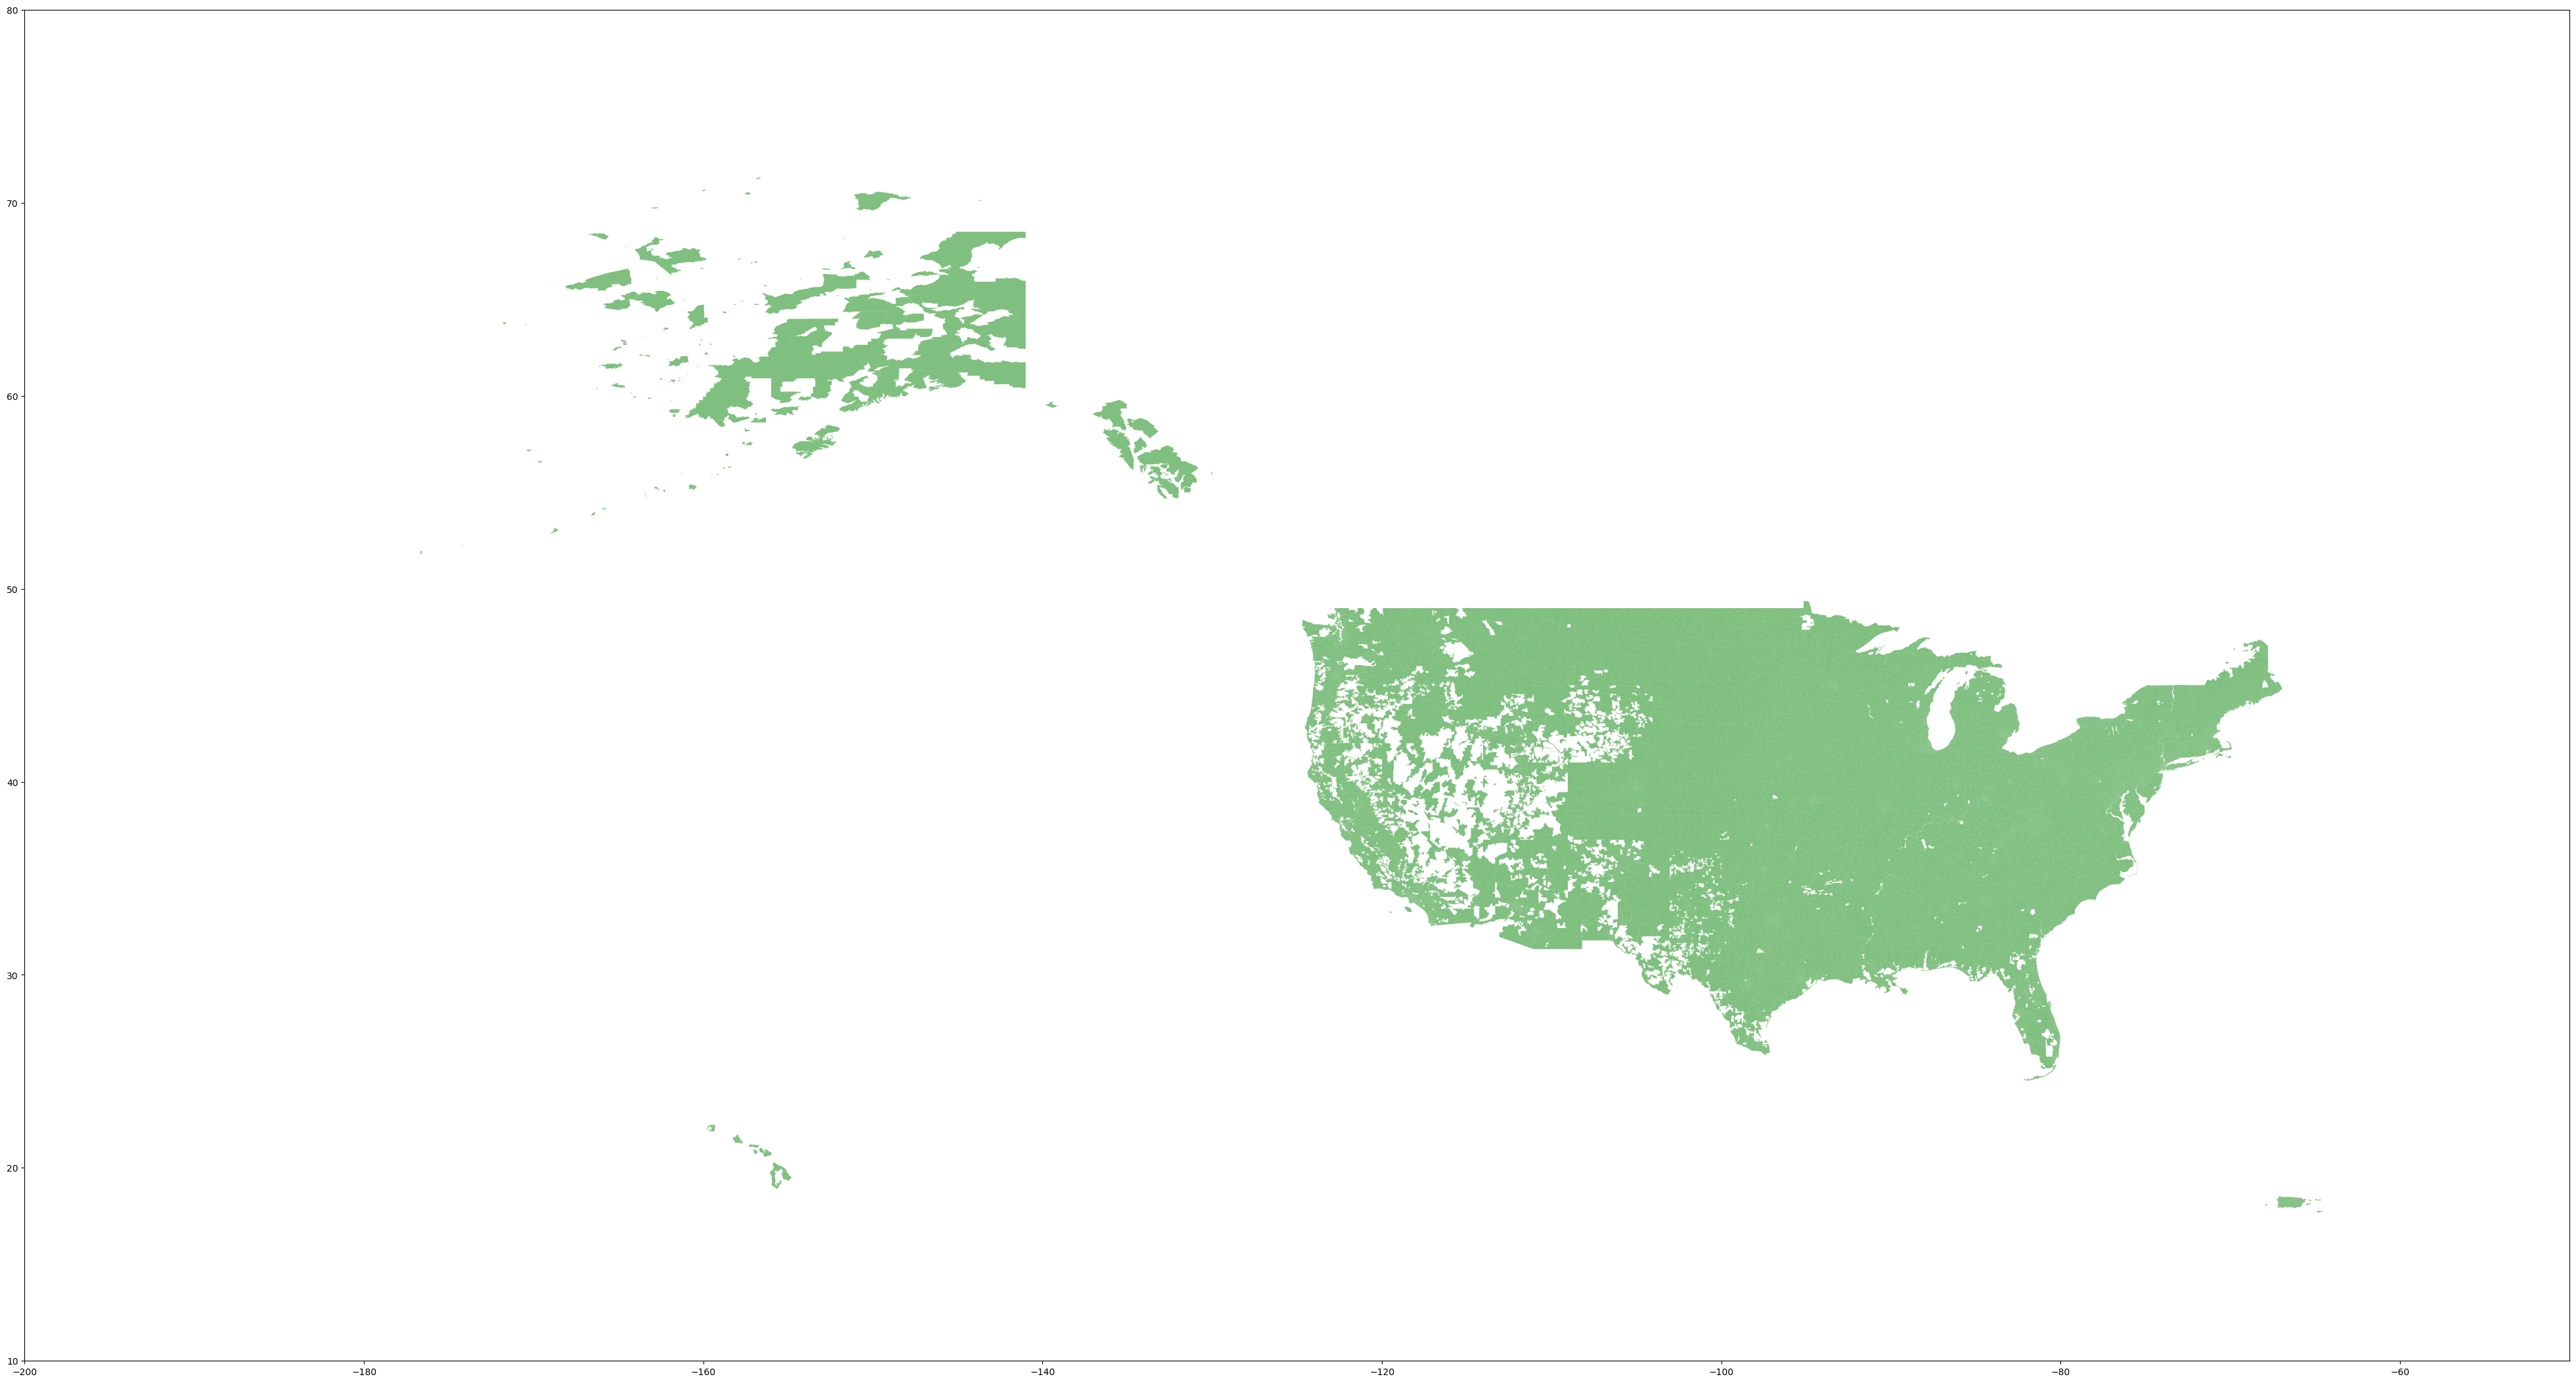

In [100]:
fig, ax = plt.subplots(1, figsize=(50, 50))
df_map.plot(facecolor='green', ax=ax, alpha=.5)
ax.set_xlim(-200, -50)
ax.set_ylim(10, 80)

(10.0, 80.0)

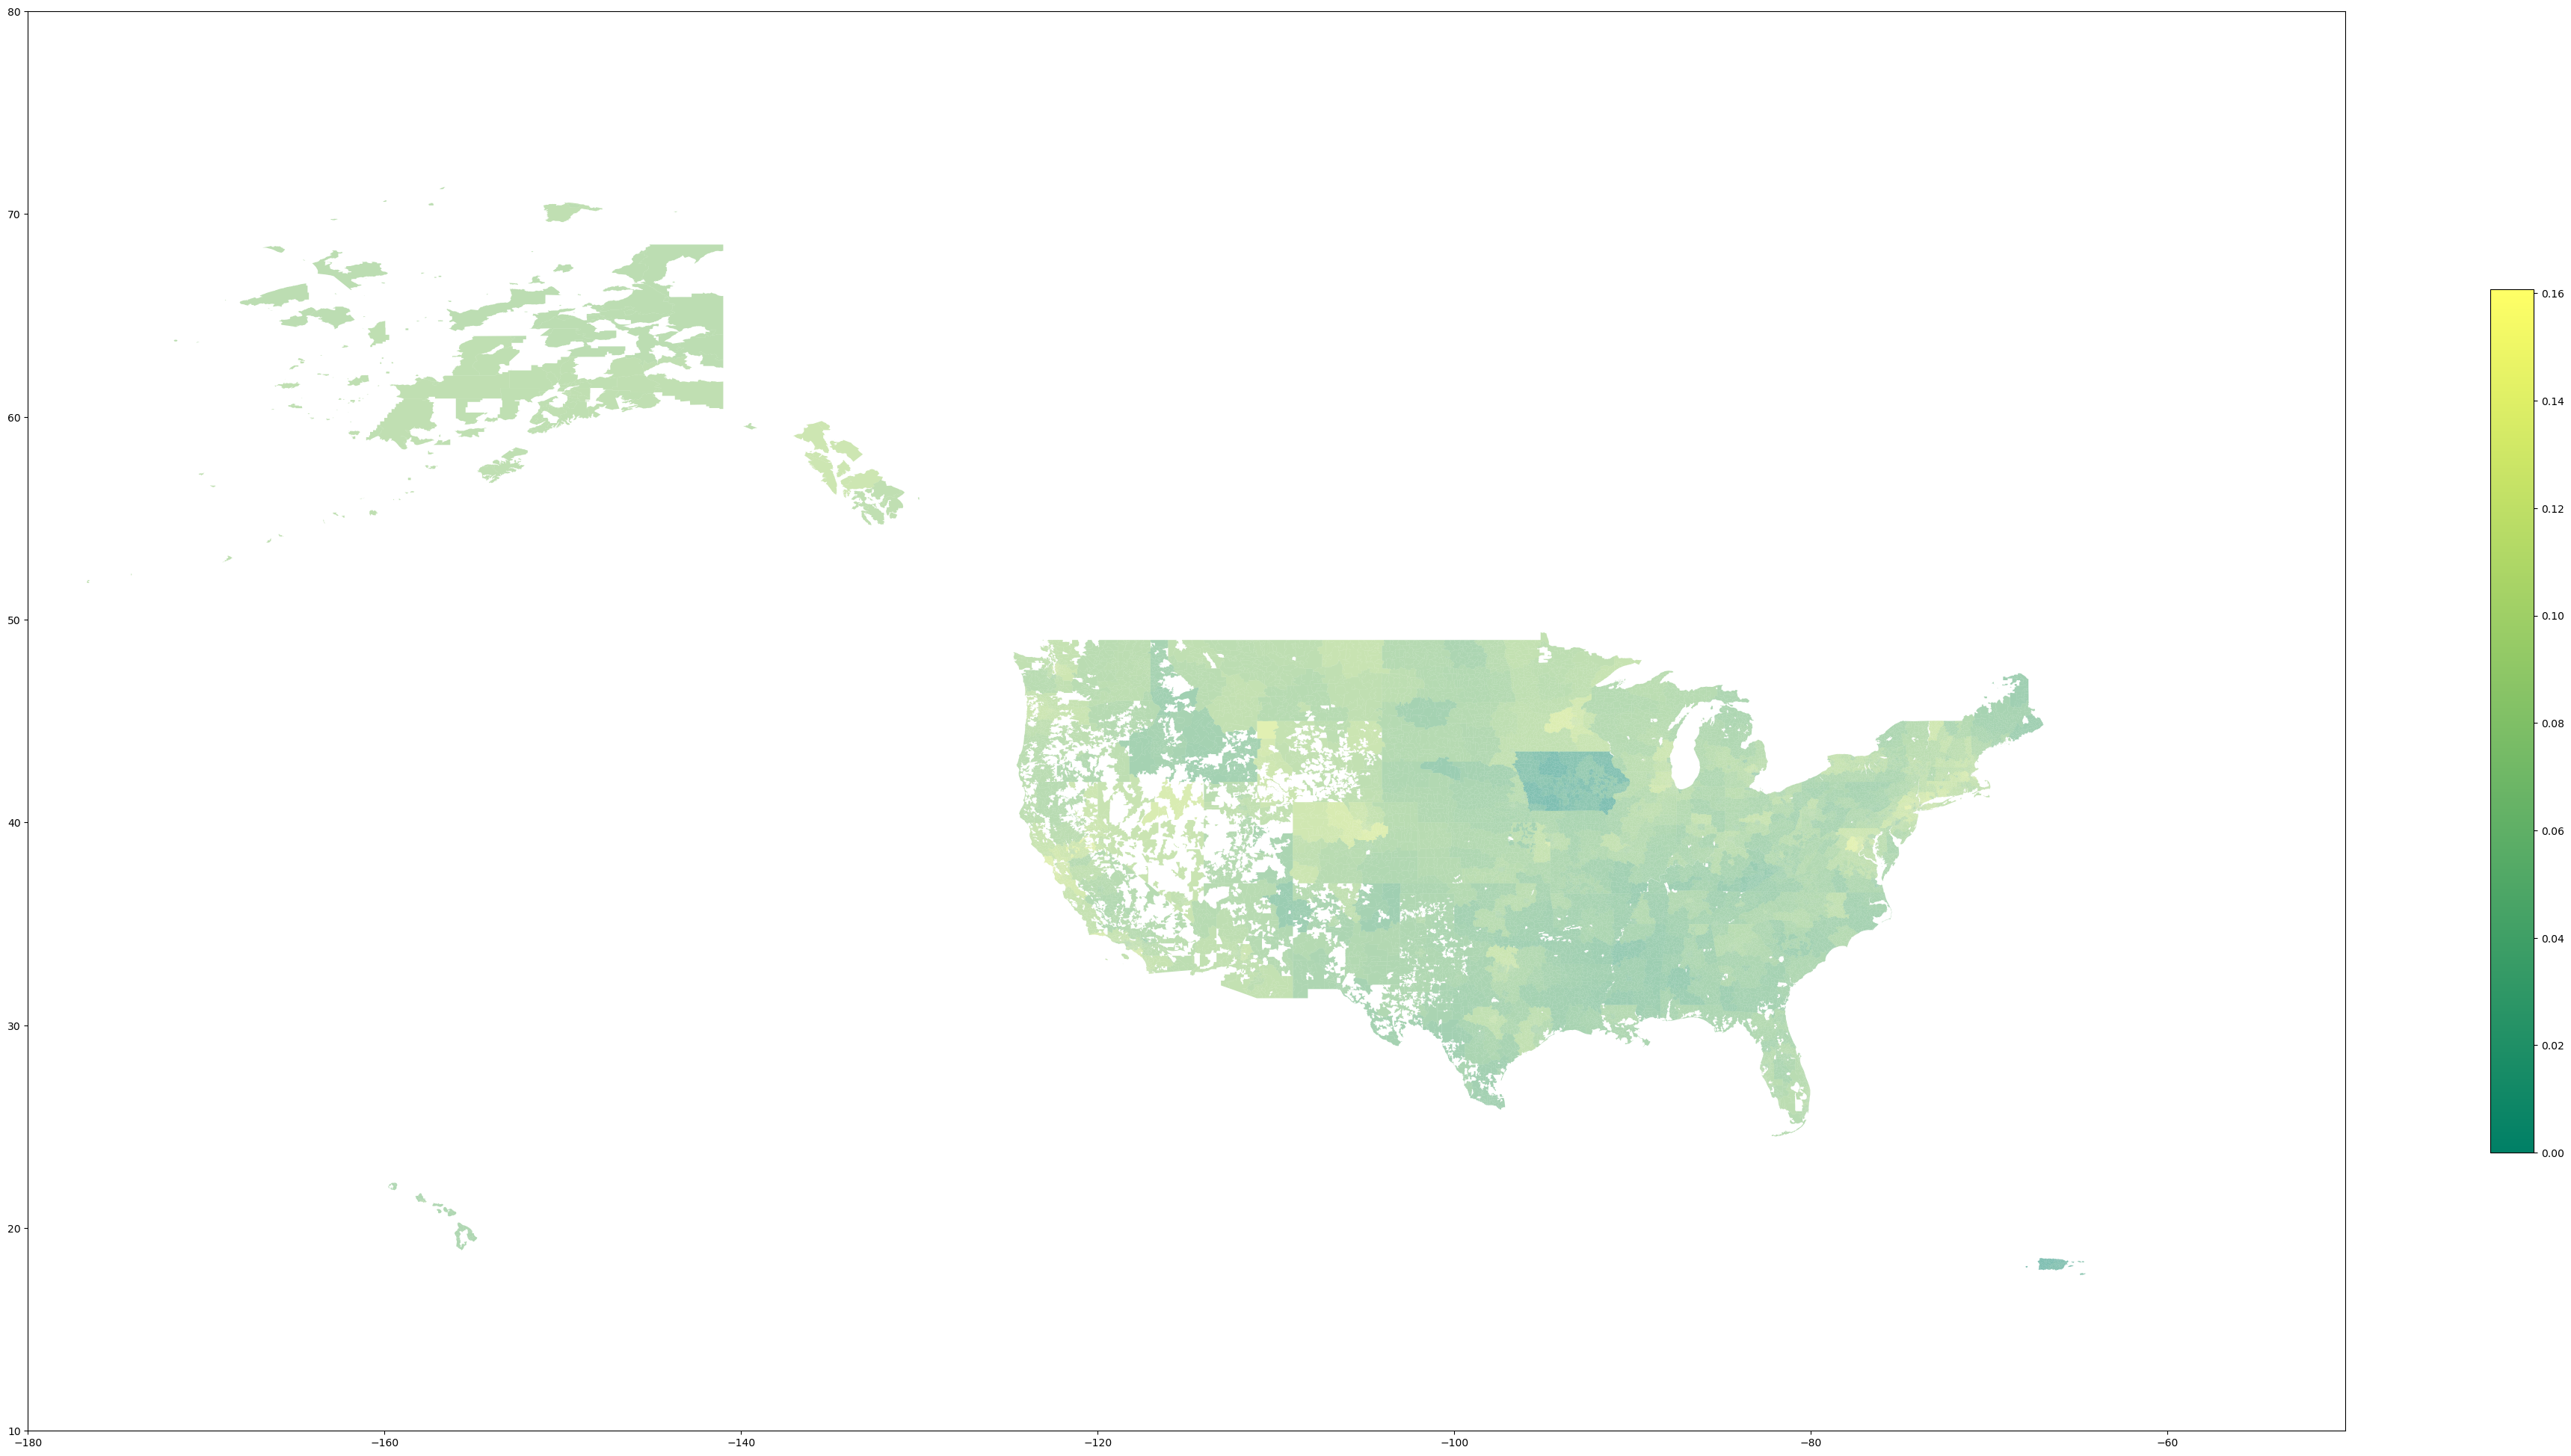

In [105]:
fig, ax = plt.subplots(1, figsize=(50, 50))
df_map.plot(column = df_map['accepted_to_total_ratio'], cmap='summer', legend=True, 
            legend_kwds={'shrink': 0.3}, ax=ax, alpha=.5)
ax.set_xlim(-180, -50)
ax.set_ylim(10, 80)
plt.show()